In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
import random

In [2]:
df = pd.read_csv('iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


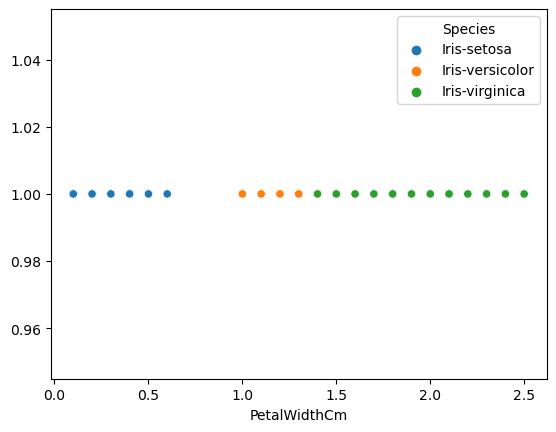

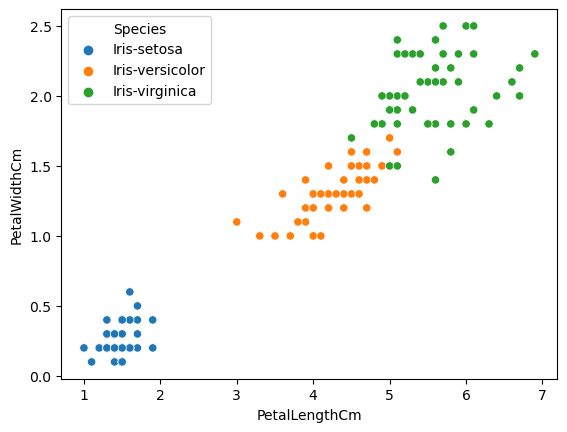

In [3]:
sns.scatterplot(data=df, x='PetalWidthCm', y=1, hue='Species')
plt.show()
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.show()

In [12]:
df_1 = df.drop(df[df['Species'] == 'Iris-setosa'].index, axis=0).reset_index(drop=True)
df_1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,51,7.0,3.2,4.7,1.4,Iris-versicolor
1,52,6.4,3.2,4.5,1.5,Iris-versicolor
2,53,6.9,3.1,4.9,1.5,Iris-versicolor
3,54,5.5,2.3,4.0,1.3,Iris-versicolor
4,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [5]:
def calcGiniImpurity(leftYes, leftNo, rightYes, rightNo):
    giLeft = 0
    giRight = 0
    weightLeft = 0
    weightRight = 0
    
    total = leftYes+leftNo+rightYes+rightNo
    
    if leftYes + leftNo != 0:
        giLeft = 1-((leftYes/(leftYes+leftNo))**2)-((leftNo/(leftYes+leftNo))**2)
        weightLeft = (leftYes+leftNo)/total
    if rightYes + rightNo != 0:
        giRight = 1-((rightYes/(rightYes+rightNo))**2)-((rightNo/(rightYes+rightNo))**2)
        weightRight = (rightYes+rightNo)/total
    
    giTotal = giLeft*weightLeft + giRight*weightRight
    return giTotal

In [6]:
def train(column):
    df = df_1.sort_values(column).reset_index(drop=True)
    
    thresholds = []
    giniImpurities = []

    for i in range(len(df)-1):
        threshold = round((df.loc[i, column] + df.loc[i+1, column])/2,2)
        thresholds.append(threshold)
    
    for i in range(len(thresholds)):
        underThresh = []
        overThresh = []
    
        for j in range(len(df)):
            if df.loc[j, column] < thresholds[i]:
                underThresh.append(df.loc[j, 'Species'])
            elif df.loc[j, column] > thresholds[i]:
                overThresh.append(df.loc[j, 'Species'])
            
        isVersicolor_Left = 0
        isVirginica_Left = 0
        isVersicolor_Right = 0
        isVirginica_Right = 0
        for j in range(len(underThresh)):
            if underThresh[j] == 'Iris-versicolor':
                isVersicolor_Left+=1
            else:
                isVirginica_Left+=1
        for j in range(len(overThresh)):
            if overThresh[j] == 'Iris-versicolor':
                isVersicolor_Right+=1
            else:
                isVirginica_Right+=1
        gi = calcGiniImpurity(isVersicolor_Left, isVirginica_Left, isVersicolor_Right, isVirginica_Right)
        giniImpurities.append([thresholds[i], gi])
    
    giDF = pd.DataFrame(giniImpurities, columns=['threshold','giniImpurity'])
    giDF.loc[giDF['giniImpurity'].idxmin()]
    
    return giDF.loc[giDF['giniImpurity'].idxmin()]

In [7]:
train('PetalLengthCm')

threshold       4.800000
giniImpurity    0.097168
Name: 45, dtype: float64

In [8]:
train('PetalWidthCm')

threshold       1.700000
giniImpurity    0.095318
Name: 52, dtype: float64

In [9]:
train('SepalLengthCm')

threshold       6.200000
giniImpurity    0.384749
Name: 45, dtype: float64

In [10]:
train('SepalWidthCm')

threshold       3.000000
giniImpurity    0.460545
Name: 55, dtype: float64